In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import time


In [2]:
cols ="""duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, st_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate"""

columns =[]
for c in cols.split(', ' or '. '):
    if(c.strip()):
       columns.append(c.strip())
    
print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'st_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [3]:
columns.append('target')
columns.append('label')
print(columns)
print(len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'st_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target', 'label']
43


In [4]:
attacks_types = {'normal': 'normal', 'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 
                 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop':'r2l', 
                 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 
                 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 
                 'warezmaster': 'r2l'}

In [33]:
path = "KDDT20p-Copy1"
df = pd.read_csv(path, names = columns)
# Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:]])
df.head()
# print(df.head())
pandadata = pd.DataFrame(df)
pandadata.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,label,Attack Type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [34]:
df.to_csv('kdd.csv', index=False)

In [53]:
newdata3 = pandadata['land'].value_counts()
print(newdata3)
newdata2 = pandadata['urgent'].value_counts()
print(newdata2)
newdata1 = pandadata['num_shells'].value_counts()
print(newdata1)

0    25190
1        2
Name: land, dtype: int64
0    25191
1        1
Name: urgent, dtype: int64
0    25183
1        9
Name: num_shells, dtype: int64


In [54]:
# Code: Shape of dataframe and getting data type of each feature

df.shape
print(df.shape)

# Code: Finding missing values of all features.

df.isnull().sum()

# print(df.isnull().sum())

(25192, 44)


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [55]:
#Code: Finding Categorical Features
# X = np.where(df.values >=np.finfo(np.float64).max)
# Finding categorical features
num_cols = df._get_numeric_data().columns
  
cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')
  
cate_cols
print(cate_cols)

['flag', 'protocol_type', 'service']


C:\Users\KAUSHI~1\AppData\Local\Temp/ipykernel_16460/1934690868.py:41: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')# drop columns with NaN


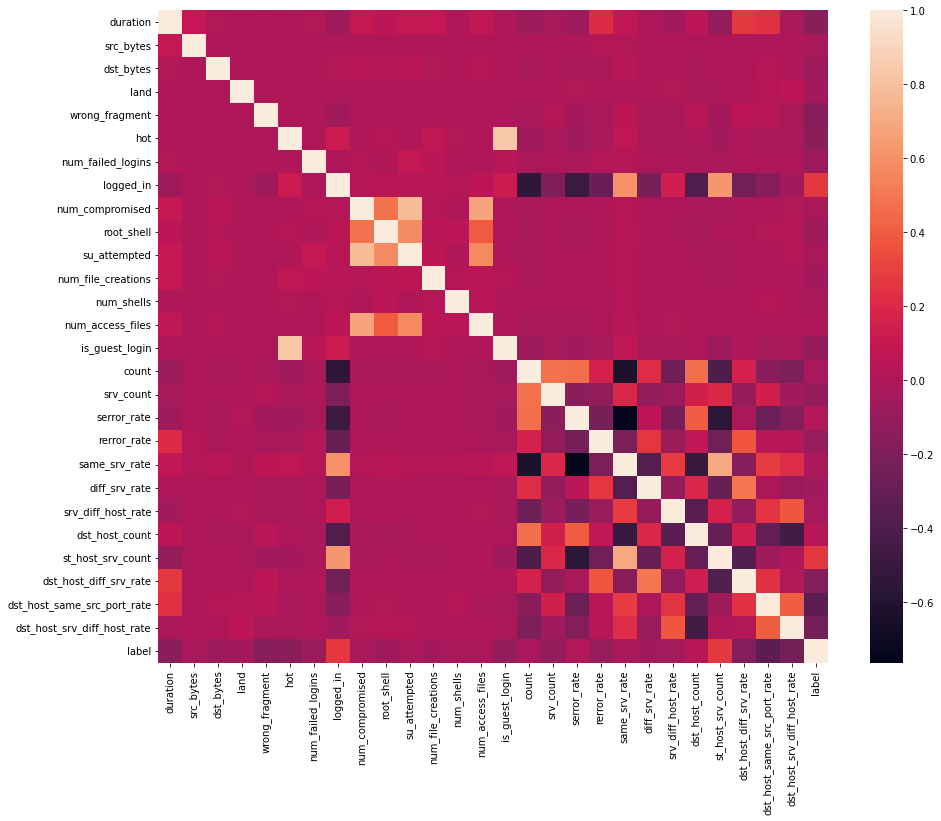

In [56]:
# =============== ignoring some non participating features =================



# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

df.drop('urgent', axis = 1, inplace = True)

# heat map after dropping table.... can be drawn without dropping some non corellative columns

df = df.dropna('columns')# drop columns with NaN
  
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values
  
corr = df.corr()
 
plt.figure(figsize =(15, 12))
  
sns.heatmap(corr)
  
plt.show()

#===============================================================================================

# Code: Feature Mapping – Apply feature mapping on features such as : ‘protocol_type’ & ‘flag’.


# protocol_type feature mapping
pmap = {'icmp':0, 'tcp':1, 'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df['flag'] = df['flag'].map(fmap)

# Code: Remove irrelevant features such as ‘service’ before modelling
df.drop('service', axis = 1, inplace = True)

In [57]:
df['Attack Type'].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [58]:
df.head(20)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,st_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,label,Attack Type
0,0,1,0,491,0,0,0,0,0,0,...,0.00,0.00,150,25,0.03,0.17,0.00,normal,20,normal
1,0,2,0,146,0,0,0,0,0,0,...,0.15,0.00,255,1,0.60,0.88,0.00,normal,15,normal
2,0,1,1,0,0,0,0,0,0,0,...,0.07,0.00,255,26,0.05,0.00,0.00,neptune,19,dos
3,0,1,0,232,8153,0,0,0,0,1,...,0.00,0.00,30,255,0.00,0.03,0.04,normal,21,normal
4,0,1,0,199,420,0,0,0,0,1,...,0.00,0.09,255,255,0.00,0.00,0.00,normal,21,normal
5,0,1,2,0,0,0,0,0,0,0,...,0.06,0.00,255,19,0.07,0.00,0.00,neptune,21,dos
6,0,1,1,0,0,0,0,0,0,0,...,0.06,0.00,255,9,0.05,0.00,0.00,neptune,21,dos
7,0,1,1,0,0,0,0,0,0,0,...,0.06,0.00,255,15,0.07,0.00,0.00,neptune,21,dos
8,0,1,1,0,0,0,0,0,0,0,...,0.05,0.00,255,23,0.05,0.00,0.00,neptune,21,dos
9,0,1,1,0,0,0,0,0,0,0,...,0.06,0.00,255,13,0.06,0.00,0.00,neptune,21,dos


In [12]:
# distribution=df.sample(500)
# sns.pairplot(df,hue='Attack Type')

In [13]:
from sklearn import model_selection

df = df.drop(['target'],axis=1,)
print(df.shape)

X = df.loc[:,"duration":"label"]
Y = df['Attack Type']

print(X.shape)
print(Y.shape)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state = 0)
X_train.shape, X_test.shape, type(X_train)

(25192, 31)
(25192, 30)
(25192,)


((18894, 30), (6298, 30), pandas.core.frame.DataFrame)

In [14]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.05854617, 0.09154221, 0.49284498, 0.71754289, 0.45704201,
       0.00437907, 0.00821449, 0.01357747, 0.        , 0.31397723,
       0.00229422, 0.        , 0.00128971, 0.00182476, 0.        ,
       0.        , 0.01004014, 0.42056098, 0.16279226, 0.37851361,
       0.0753891 , 0.45566238, 0.50687316, 0.14632671, 0.20670953,
       0.40911522, 0.45603478, 0.23865464, 0.26319235, 0.25514023])

In [15]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.717543
diff_srv_rate                  0.506873
flag                           0.492845
dst_bytes                      0.457042
dst_host_diff_srv_rate         0.456035
same_srv_rate                  0.455662
count                          0.420561
st_host_srv_count              0.409115
serror_rate                    0.378514
logged_in                      0.313977
dst_host_srv_diff_host_rate    0.263192
label                          0.255140
dst_host_same_src_port_rate    0.238655
dst_host_count                 0.206710
srv_count                      0.162792
srv_diff_host_rate             0.146327
protocol_type                  0.091542
rerror_rate                    0.075389
duration                       0.058546
hot                            0.013577
is_guest_login                 0.010040
wrong_fragment                 0.008214
land                           0.004379
num_compromised                0.002294
num_file_creations             0.001825


<AxesSubplot:>

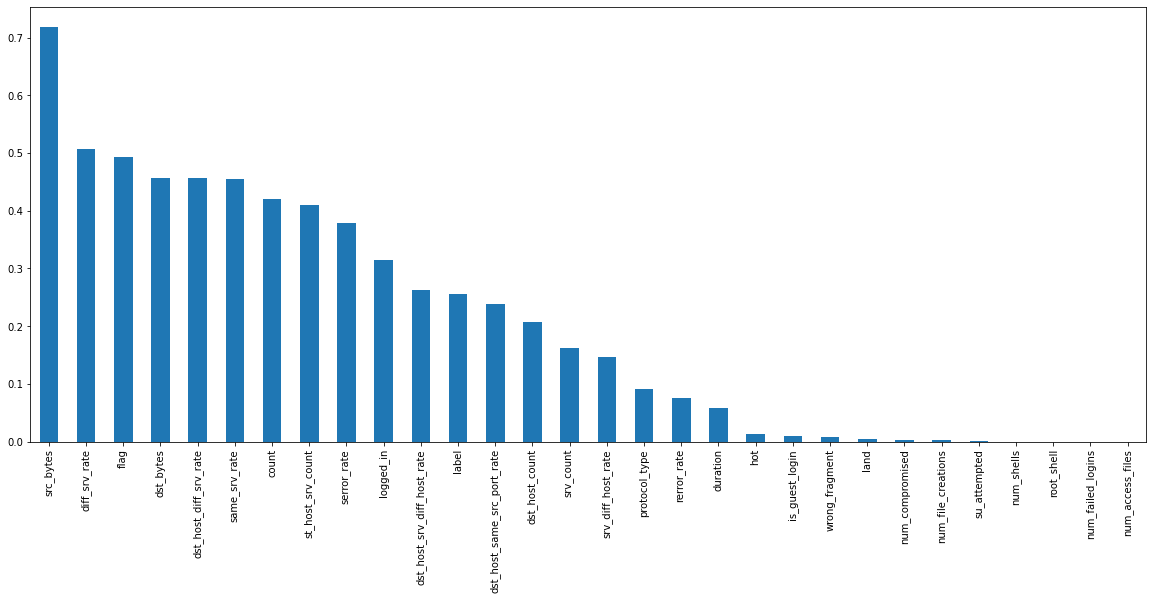

In [16]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [17]:
from sklearn.feature_selection import SelectKBest

In [18]:
#No we Will select the  top 19 important features
sel_cols = SelectKBest(mutual_info_classif, k=19)
sel_cols.fit(X_train, y_train)
sel_cols.fit(X_test, y_test)
X_train.columns[sel_cols.get_support()]

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'st_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'label'],
      dtype='object')

In [19]:
X_train = X_train[X_train.columns[sel_cols.get_support()]]
X_test = X_test[X_test.columns[sel_cols.get_support()]]
X_train.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,st_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label
6761,0,1,0,221,21761,1,8,8,0.0,0.0,1.00,0.00,0.0,69,255,0.00,0.01,0.04,21
25106,0,1,1,0,0,0,149,24,1.0,0.0,0.16,0.05,0.0,255,8,0.06,0.00,0.00,18
11572,0,1,2,0,0,0,1,1,0.0,1.0,1.00,0.00,0.0,1,104,0.00,1.00,0.18,21
4355,0,1,1,0,0,0,95,15,1.0,0.0,0.16,0.05,0.0,255,4,0.07,0.00,0.00,18
12793,0,1,2,0,0,0,285,14,0.0,1.0,0.05,0.06,0.0,255,14,0.07,0.00,0.00,20


In [20]:
X_train.shape

(18894, 19)

In [35]:
print("Apply various machine learning classification algorithms such as Support Vector Machines, Random Forest, Naive Bayes, Decision Tree, Logistic Regression to create different models. \n")

print("Implementation of Guassian Naive Bayes \n")

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
  
clfg = GaussianNB()
start_timeGB = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_timeGB = time.time()
training_timeNB = end_timeGB - start_timeGB
print("Training time Gaussian Naive Bayes: ", training_timeNB)

# testing time ================================================================

start_time = time.time()
y_test_pred = clfg.predict(X_test)
end_time = time.time()
testing_timeNB = end_time-start_time
print("Testing time Gaussian Naive Bayes: ", testing_timeNB)

trainNB = clfg.score(X_train, y_train)
testNB = clfg.score(X_test, y_test)
print("Train score is:", trainNB)
print("Test score is:", testNB)


Apply various machine learning classification algorithms such as Support Vector Machines, Random Forest, Naive Bayes, Decision Tree, Logistic Regression to create different models. 

Implementation of Guassian Naive Bayes 

Training time Gaussian Naive Bayes:  0.11901235580444336
Testing time Gaussian Naive Bayes:  0.015020370483398438
Train score is: 0.44262728908648247
Test score is: 0.4380755795490632


In [37]:
naive_acc = accuracy_score(y_test,y_test_pred)
naive_acc

0.4380755795490632

In [38]:
#Code: Python implementation of Decision Tree

# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
  
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()
training_timeDT = end_time-start_time
print("Training time Decision Tree: ", training_timeDT)

start_time = time.time()
y_test_pred = clfd.predict(X_test)
end_time = time.time()
testing_timeDT = end_time-start_time
print("Testing time Decision Tree: ", testing_timeDT)

trainDT = clfd.score(X_train, y_train)
testDT = clfd.score(X_test, y_test)
print("Train score is:", trainDT)
print("Test score is:", testDT)

Training time Decision Tree:  0.15558409690856934
Testing time Decision Tree:  0.007025241851806641
Train score is: 0.9721604742246216
Test score is: 0.9725309622102255


In [40]:
Decision_acc = accuracy_score(y_test,y_test_pred)
Decision_acc

0.9725309622102255

In [41]:
# Code: Python code implementation of Random Forest

from sklearn.ensemble import RandomForestClassifier
  
clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()
training_timeRF = end_time-start_time
print("Training time Random Forest: ",training_timeRF)

y_test_pred = clfr.predict(X_test)
end_time = time.time()
testing_timeRF = end_time-start_time
print("Testing time Random Forest: ", testing_timeRF)

trainRF = clfr.score(X_train, y_train)
testRF = clfr.score(X_test, y_test)
print("Train score is:", trainRF)
print("Test score is:", testRF)

Training time Random Forest:  1.026679515838623
Testing time Random Forest:  1.1062417030334473
Train score is: 1.0
Test score is: 0.9976182915211178


In [42]:
random_acc = accuracy_score(y_test,y_test_pred)
random_acc

0.9976182915211178

In [43]:
# Code: Python implementation of Support Vector Classifier

from sklearn.svm import SVC
  
clfs = SVC()
start_time = time.time()
clfs.fit(X_train, y_train.values.ravel())
end_time = time.time()
training_timeSVM = end_time-start_time
print("Training time Support Vector Classifier: ", training_timeSVM)

start_time = time.time()
y_test_pred = clfs.predict(X_test)
end_time = time.time()
testing_timeSVM = end_time-start_time
print("Testing time Support Vector Classifier: ", testing_timeSVM)

trainSVM = clfr.score(X_train, y_train)
testSVM = clfr.score(X_test, y_test)
print("Train score is:", trainSVM)
print("Test score is:", testSVM)

Training time Support Vector Classifier:  60.78682827949524
Testing time Support Vector Classifier:  35.43154859542847
Train score is: 1.0
Test score is: 0.9976182915211178


In [44]:
SVM_acc = accuracy_score(y_test,y_test_pred)
SVM_acc 

0.5384248967926326

In [48]:
#Code: Python implementation of Logistic Regression

from sklearn.linear_model import LogisticRegression
  
clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(X_train, y_train.values.ravel())
end_time = time.time()
training_timeLR = end_time-start_time
print("Training time Logistic Regression: ", training_timeLR)


start_time = time.time()
y_test_pred = clfl.predict(X_test)
end_time = time.time()
testing_timeLR = end_time-start_time
print("Testing time Logistic Regression: ", testing_timeLR)

trainLR = clfr.score(X_train, y_train)
testLR = clfr.score(X_test, y_test)
print("Train score is:", trainLR)
print("Test score is:", testLR)

Training time Logistic Regression:  22.248759031295776
Testing time Logistic Regression:  0.003999948501586914
Train score is: 1.0
Test score is: 0.9976182915211178


In [49]:
Log_acc = accuracy_score(y_test,y_test_pred)
Log_acc

0.8451889488726579

In [45]:
#Code: Python implementation of Gradient Descent
 
from sklearn.ensemble import GradientBoostingClassifier
  
clfg = GradientBoostingClassifier(random_state = 0)
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
training_timeGB = end_time-start_time
print("Training time Gradient Descent: ", training_timeGB)

start_time = time.time()
y_test_pred = clfg.predict(X_test)
end_time = time.time()
testing_timeGB = end_time-start_time
print("Testing time Gradient Descent: ", testing_timeGB)

trainGB = clfr.score(X_train, y_train)
testGB = clfr.score(X_test, y_test)
print("Train score is:", trainGB)
print("Test score is:", testGB)

Training time Gradient Descent:  37.538923263549805
Testing time Gradient Descent:  0.10160994529724121
Train score is: 1.0
Test score is: 0.9976182915211178


In [47]:
grad_acc = accuracy_score(y_test,y_test_pred)
grad_acc

0.9947602413464592

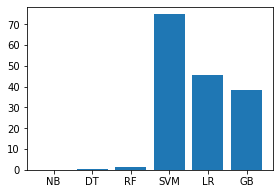

In [27]:
# Code: Analyse the training time of each model.

names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [training_timeNB, training_timeDT, training_timeRF, training_timeSVM, training_timeLR, training_timeGB]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)
plt.show()

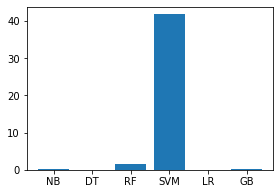

In [28]:
# Code: Analyse the testing time of each model.

names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [testing_timeNB, testing_timeDT, testing_timeRF, testing_timeSVM, testing_timeLR, testing_timeGB]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)
plt.show()

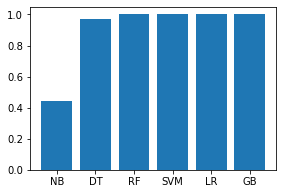

In [29]:
# Code: Analyse the training score of each model.


names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [trainNB, trainDT, trainRF, trainSVM, trainLR, trainGB]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)
plt.show()

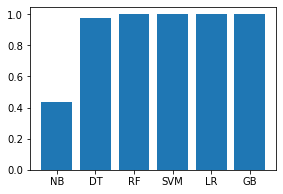

In [30]:
# Code: Analyse the test score of each model.

names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [testNB, testDT, testRF, testSVM, testLR, testGB]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values) 
plt.show()

In [31]:
print(y_train.values.ravel())

['normal' 'dos' 'normal' ... 'dos' 'normal' 'normal']


In [50]:
final_data = pd.DataFrame({'Models':['NB','DT','RF','SVC','LR','GB'],'ACC':[naive_acc*100,
                                                    Decision_acc*100,
                                                    random_acc*100,
                                                    SVM_acc*100,
                                                    Log_acc*100,
                                                    grad_acc*100]})

In [51]:
final_data

,Models,ACC
0,NB,43.807558
1,DT,97.253096
2,RF,99.761829
3,SVC,53.842490
4,LR,84.518895
5,GB,99.476024


In [59]:
df.to_csv('kdd.csv', index=False)

In [52]:
import pickle

#pickle.dump(df,open('df.pkl','wb'))
#pickle.dump(pipe,open('pipe.pkl','wb'))
df.to_csv("df.csv", index = False)
pickle.dump(clfr,open('pipe.pkl','wb'))